# **TP 2 :Breast Cancer Dataset Tutorial**

Ce tutoriel présente une implémentation du Breast Cancer Dataset, un problème de classification binaire où l’objectif est de prédire si une tumeur est maligne (0) ou bénigne (1) en se basant sur 30 caractéristiques extraites de l’imagerie médicale.





# **1. Introduction:**



Le jeu de données sur le cancer du sein est un ensemble de données bien connu utilisé pour des tâches de classification binaire. Il contient 569 échantillons, chacun avec 30 caractéristiques (par exemple, le rayon, la texture, le périmètre) extraites d'images médicales. La variable cible est binaire :



0 : Tumeur maligne (cancéreuse)

1 : Tumeur bénigne (non cancéreuse)


# **2. Configuration :**




Avant d'exécuter le code, vous devez installer les bibliothèques requises :

pip install numpy pandas scikit-learn xgboost matplotlib

Ces bibliothèques sont essentielles pour la manipulation des données, l'entraînement des modèles et la visualisation.

# **2.1 Importation des librairies necessaires au travail**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,confusion_matrix
import matplotlib.pyplot as plt


numpy et pandas : Pour la manipulation numérique et des données.

scikit-learn : Pour le chargement des données, l'entraînement des modèles et l'évaluation.

xgboost : Pour le modèle XGBoost.

matplotlib : Pour la visualisation

# **2.2 Lecture des fichiers de données**
Pour ce TP, nous allons lire les données à partir sklearn.datasets.

In [2]:
# données
# Charger le dataset
data = load_breast_cancer()

# Convertir en DataFrame Pandas
df = pd.DataFrame(data.data, columns=data.feature_names)

# Ajouter la colonne des labels
df["Label"] = data.target

# Afficher les 5 premières lignes du dataset
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [3]:
# Nombre d’échantillons et de caractéristiques
print("Dimensions du dataset :", df.shape)

# Vérification des types de données
print(df.dtypes)

# Vérification des valeurs manquantes
print("Valeurs manquantes :", df.isnull().sum().sum())


Dimensions du dataset : (569, 31)
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points 

Label
1    357
0    212
Name: count, dtype: int64


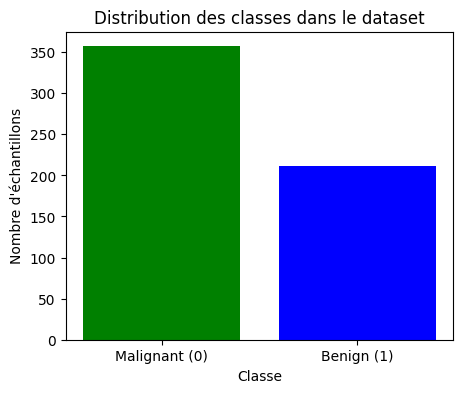

In [4]:
# Compter les occurrences des labels
label_counts = df["Label"].value_counts()

# Affichage du nombre d'échantillons par classe
print(label_counts)

# Afficher un graphique
plt.figure(figsize=(5, 4))
plt.bar(["Malignant (0)", "Benign (1)"], label_counts, color=["green", "blue"])
plt.xlabel("Classe")
plt.ylabel("Nombre d'échantillons")
plt.title("Distribution des classes dans le dataset")
plt.show()

In [5]:

# Afficher les statistiques
print(df.describe())



       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

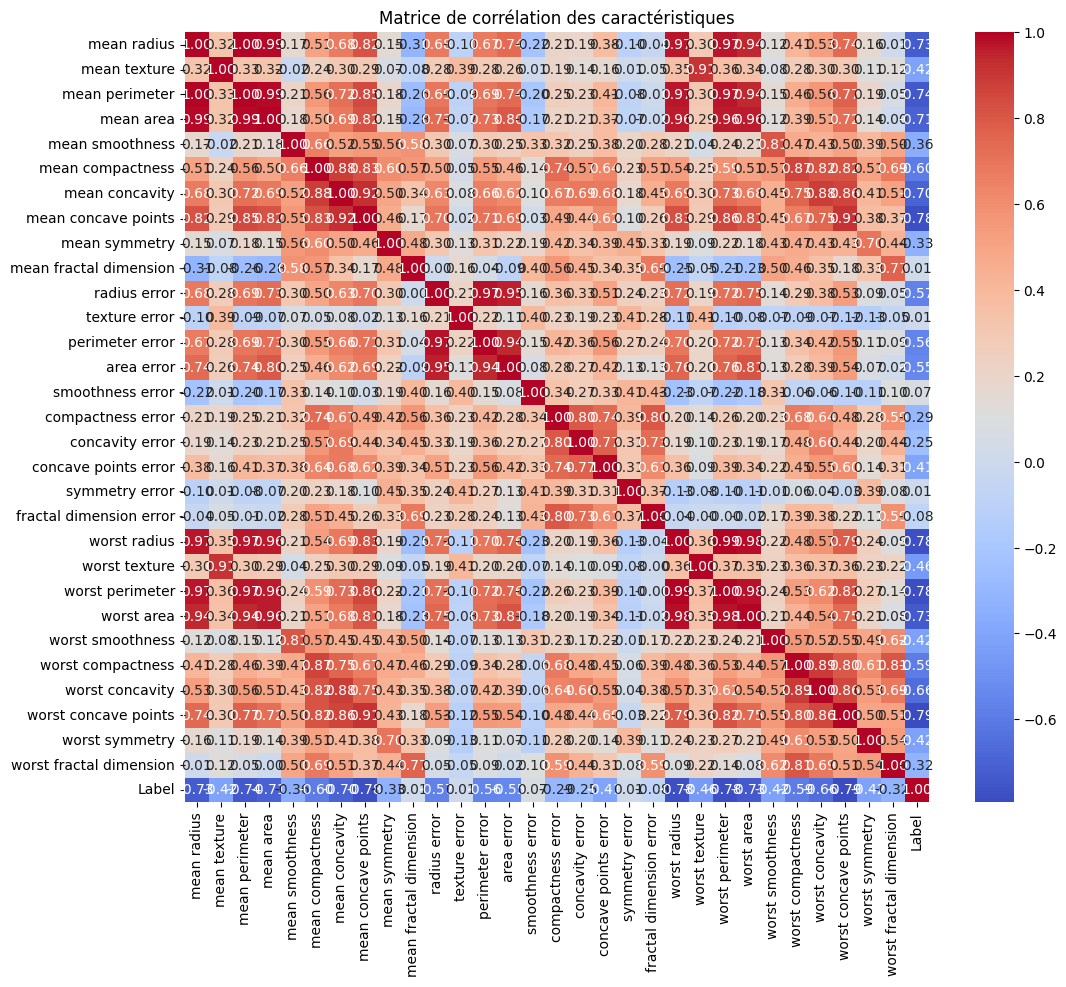

In [6]:
# Matrice de corrélation
# est un outil visuel puissant pour comprendre les relations entre les différentes caractéristiques (variables) d'un jeu de données.
#Une matrice de corrélation est une table qui montre les coefficients de corrélation entre les variables. Chaque cellule de la matrice représente la corrélation entre deux variables. Le coefficient de corrélation est une valeur comprise entre -1 et 1 :

#1 : Corrélation positive parfaite (les deux variables augmentent ensemble).

#-1 : Corrélation négative parfaite (une variable augmente tandis que l'autre diminue).

#0 : Aucune corrélation (les variables sont indépendantes).


plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Matrice de corrélation des caractéristiques")
plt.show()

#Rouge foncé = Corrélation positive forte (les deux augmentent ensemble).
#Bleu foncé = Corrélation négative forte (l'une augmente, l'autre diminue).
#Blanc ou clair = Peu ou pas de corrélation.

In [10]:
# Séparer X et y
X = df.drop(columns=["Label"])  # Caractéristiques
y = df["Label"]  # Labels

# **3. Diviser le jeu de données**

In [11]:

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Le jeu de données est divisé en :


Ensemble d'entraînement (70 %) : Utilisé pour entraîner le modèle.


Ensemble de test (30 %) : Utilisé pour évaluer le modèle.


random_state=42 assure la reproductibilité.

**Graphiques de clustering (t-SNE, UMAP):**

Les graphiques de clustering (comme t-SNE ou UMAP) permettent de visualiser la structure des données en 2D ou 3D. Cela peut aider à comprendre la séparabilité des classes.

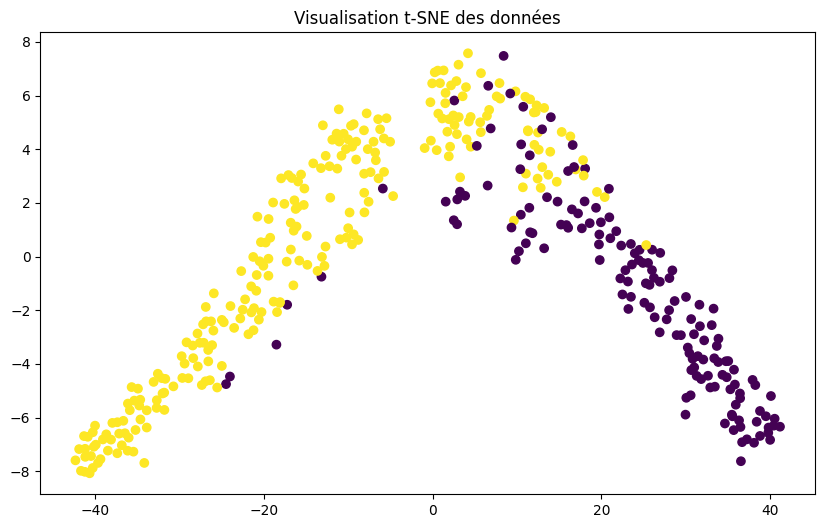

In [44]:
from sklearn.manifold import TSNE

# Appliquer t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('Visualisation t-SNE des données')
plt.show()

# **3.1 Définir la fonction d'évaluation**

In [12]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Accuracy: {accuracy:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


accuracy_score : Mesure le pourcentage de prédictions correctes.


roc_auc_score : Évalue la capacité du modèle à distinguer entre les classes (plus élevé est meilleur).


classification_report : Fournit la précision, le rappel, le score F1 et le support pour chaque classe.

In [13]:
from sklearn.model_selection import learning_curve

# Fonction pour tracer les learning curves
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Score d\'entraînement')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Score de validation')
    plt.xlabel('Taille du jeu d\'entraînement')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

#**4. Entraîner et évaluer les modèles**

entrainer les model:arbre de décison,random forest,xgbost,knn

# **4.1 Arbre de décision**

In [14]:


# 1. Decision Tree
#DecisionTreeClassifier : Un modèle d'arbre de décision unique.
print("Decision Tree:")
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
#Limité à 5 niveaux de profondeur (max_depth=5) pour éviter le sur-apprentissage (overfitting).
#max_depth=5 : Limite la profondeur de l'arbre pour éviter le surajustement.
#random_state=42 : Assure la reproductibilité.
dt_model.fit(X_train, y_train)
evaluate_model(dt_model, X_test, y_test)




Decision Tree:
Accuracy: 0.95
ROC AUC: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



# **4.2 Forêt aléatoire**

In [15]:
# 2. Random Forest
#RandomForestClassifier : Un ensemble d'arbres de décision.
#n_estimators=100 : Utilise 100 arbres dans la forêt.
#max_depth=5 : Limite la profondeur de chaque arbre.
print("Random Forest:")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)


Random Forest:
Accuracy: 0.96
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# **4.3 XGBoost**

In [17]:
# 3. XGBoost
#XGBClassifier : Un modèle de boosting par gradient.
#Chaque nouvel arbre corrige les erreurs commises par les précédents.
#use_label_encoder=False : Évite un avertissement concernant l'encodage des étiquettes.
#eval_metric='logloss' : Utilise la perte logarithmique comme métrique d'évaluation.
print("XGBoost:")
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test)

XGBoost:


c:\Users\HERO-INFO\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [07:15:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.97
ROC AUC: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



# **4.4 K-Nearest Neighbors (KNN)**

In [16]:
# 4. K-Nearest Neighbors (KNN)
# KNeighborsClassifier : Un modèle KNN.
# n_neighbors=5 : Utilise 5 voisins les plus proches pour la classification.
print("K-Nearest Neighbors (KNN):")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
evaluate_model(knn_model, X_test, y_test)


K-Nearest Neighbors (KNN):
Accuracy: 0.96
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171




# **5. Ajustement des hyperparamètres avec GridSearchCV**

GridSearchCV est un outil puissant de scikit-learn pour l'ajustement des hyperparamètres. Il effectue une recherche exhaustive sur une grille de paramètres spécifiée pour trouver la meilleure combinaison d'hyperparamètres pour un modèle. Il utilise la validation croisée pour évaluer chaque combinaison, garantissant que les hyperparamètres sélectionnés généralisent bien à des données invisibles.

Comment fonctionne GridSearchCV ?

**1.Définir une grille de paramètres :**

Spécifiez les hyperparamètres et leurs valeurs possibles sous forme de dictionnaire.

Exemple : Pour une forêt aléatoire, vous pourriez ajuster n_estimators, max_depth, et min_samples_split.

**2.Validation croisée :**

GridSearchCV divise les données en ensembles d'entraînement et de validation plusieurs fois (en fonction du paramètre cv) pour évaluer chaque combinaison d'hyperparamètres.

**3.Meilleur modèle :**

Après avoir évalué toutes les combinaisons, GridSearchCV retourne le modèle avec les meilleurs hyperparamètres.

Utilisation de GridSearchCV

Voici comment utiliser GridSearchCV avec le jeu de données sur le cancer du sein :


**Exemple :**

In [18]:
from sklearn.model_selection import GridSearchCV

#3. Define the Model and Parameter Grid
# Define the model
model = RandomForestClassifier(random_state=42)


# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}
#4. Perform Grid Search
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to evaluate
    cv=5,               # Number of cross-validation folds
    verbose=1,          # Print progress
    n_jobs=-1           # Use all available CPU cores
)
#Paramètres clés de GridSearchCV:
#estimator : Le modèle à ajuster.

#param_grid : Dictionnaire avec les hyperparamètres et leurs valeurs possibles.

#scoring : Métrique d'évaluation (par exemple, accuracy, roc_auc, f1).

#cv : Nombre de folds de validation croisée.

#verbose : Contrôle la quantité de sortie (valeurs plus élevées = plus de détails).

#n_jobs : Nombre de cœurs CPU à utiliser (-1 = utiliser tous les cœurs).



In [19]:
# Fit the model
grid_search.fit(X_train, y_train)
#5. Evaluate the Best Model
# Get the best model
best_model = grid_search.best_estimator_


# Evaluate on the test set
y_pred = best_model.predict(X_test)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



**Exercice:**

Utilisez GridSearchCV pour trouver les meilleurs hyperparamètres pour chaque modèle :

Arbre de décision : Ajustez max_depth et min_samples_split.

Forêt aléatoire : Ajustez n_estimators.

XGBoost : Ajustez learning_rate.

KNN : Ajustez n_neighbors.

2. Comparer les performances:

Comparez la précision (accuracy), l'aire sous la courbe ROC (ROC AUC) et le temps d'entraînement des quatre modèles.


3. Courbe ROC
Tracez la courbe ROC pour chaque modèle pour visualiser le compromis entre le taux de vrais positifs (True Positive Rate) et le taux de faux positifs (False Positive Rate).

# **5.1 Arbre de décision**

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Définir le modèle
dt_model = DecisionTreeClassifier(random_state=42)

# Grille de paramètres
dt_param_grid = {
    'max_depth': [3, 5, 10, None],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10]  # Nombre minimum d'échantillons pour diviser un nœud
}

# GridSearchCV
dt_grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=dt_param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Entraîner le modèle
dt_grid_search.fit(X_train, y_train)

# Meilleurs paramètres et évaluation
print("Meilleurs paramètres pour l'arbre de décision :", dt_grid_search.best_params_)
best_dt_model = dt_grid_search.best_estimator_
evaluate_model(best_dt_model, X_test, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleurs paramètres pour l'arbre de décision : {'max_depth': 3, 'min_samples_split': 2}
Accuracy: 0.96
ROC AUC: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



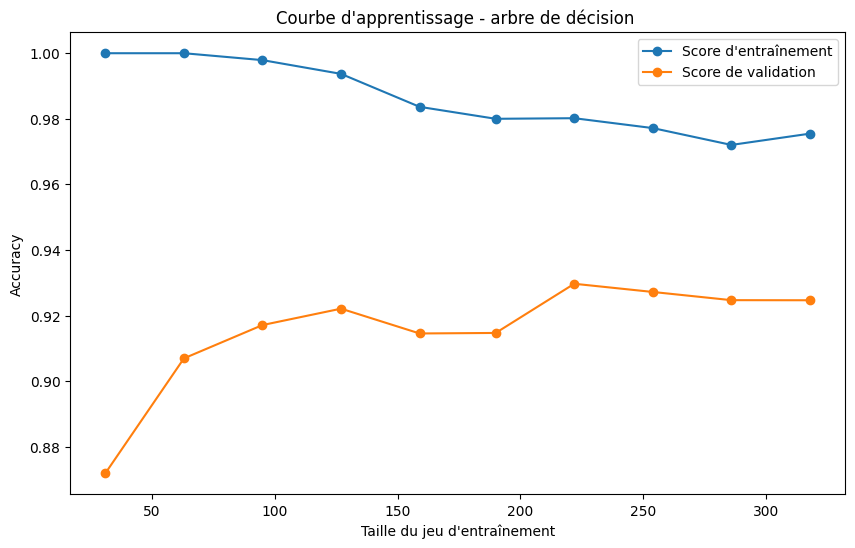

In [21]:
plot_learning_curve(best_dt_model, X_train, y_train, 'Courbe d\'apprentissage - arbre de décision ')

# **5.2 Forêt aléatoire**

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Définir le modèle
rf_model = RandomForestClassifier(random_state=42)

# Grille de paramètres
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres
    'max_depth': [None, 5, 10],      # Profondeur maximale
    'min_samples_split': [2, 5, 10]  # Nombre minimum d'échantillons pour diviser un nœud
}

# GridSearchCV
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Entraîner le modèle
rf_grid_search.fit(X_train, y_train)

# Meilleurs paramètres et évaluation
print("Meilleurs paramètres pour la forêt aléatoire :", rf_grid_search.best_params_)
best_rf_model = rf_grid_search.best_estimator_
evaluate_model(best_rf_model, X_test, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Meilleurs paramètres pour la forêt aléatoire : {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.96
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



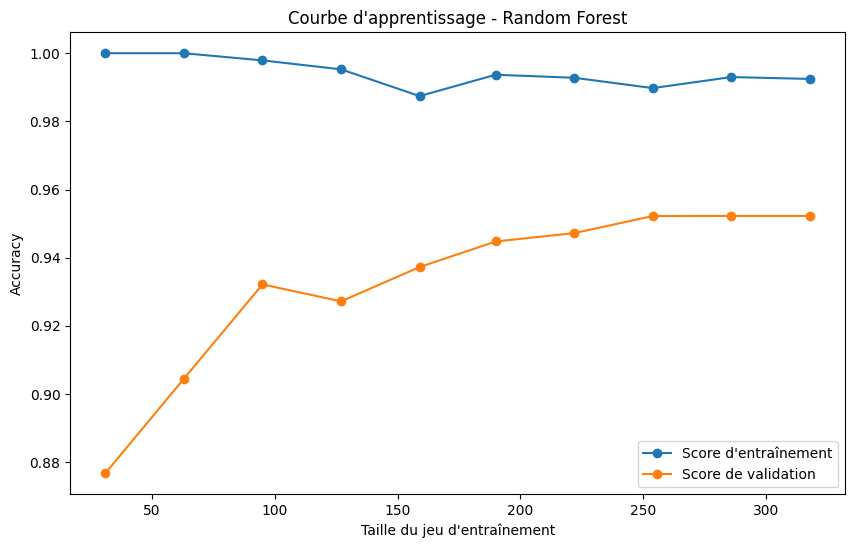

In [23]:

plot_learning_curve(best_rf_model, X_train, y_train, 'Courbe d\'apprentissage - Random Forest')

# **5.3 XGBoost**

In [24]:
from xgboost import XGBClassifier

# Définir le modèle
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Grille de paramètres
xgb_param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres
    'max_depth': [3, 5, 10],         # Profondeur maximale
    'learning_rate': [0.01, 0.1, 0.2]  # Taux d'apprentissage
}

# GridSearchCV
xgb_grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Entraîner le modèle
xgb_grid_search.fit(X_train, y_train)

# Meilleurs paramètres et évaluation
print("Meilleurs paramètres pour XGBoost :", xgb_grid_search.best_params_)
best_xgb_model = xgb_grid_search.best_estimator_
evaluate_model(best_xgb_model, X_test, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\HERO-INFO\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [07:27:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Meilleurs paramètres pour XGBoost : {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.96
ROC AUC: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



c:\Users\HERO-INFO\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [07:27:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HERO-INFO\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [07:27:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HERO-INFO\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [07:27:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_en

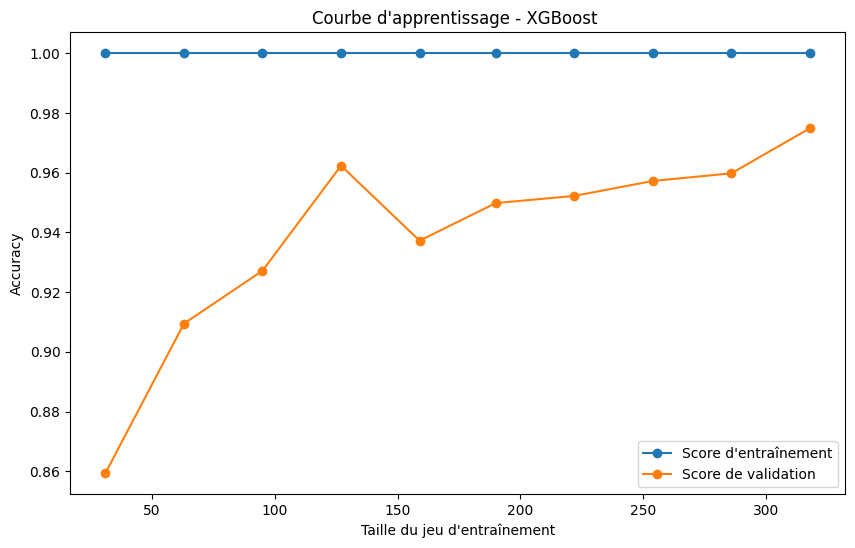

In [25]:

plot_learning_curve(best_xgb_model, X_train, y_train, 'Courbe d\'apprentissage - XGBoost ')

# **5.4 K-Nearest Neighbors (KNN)**

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Définir le modèle
knn_model = KNeighborsClassifier()

# Grille de paramètres
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Nombre de voisins
    'weights': ['uniform', 'distance']  # Poids des voisins
}

# GridSearchCV
knn_grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=knn_param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Entraîner le modèle
knn_grid_search.fit(X_train, y_train)

# Meilleurs paramètres et évaluation
print("Meilleurs paramètres pour KNN :", knn_grid_search.best_params_)
best_knn_model = knn_grid_search.best_estimator_
evaluate_model(best_knn_model, X_test, y_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Meilleurs paramètres pour KNN : {'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.96
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



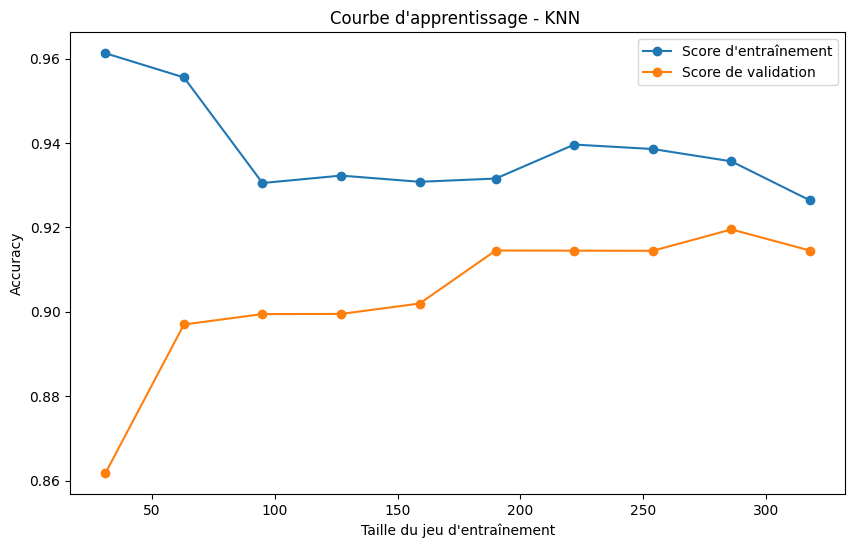

In [27]:

plot_learning_curve(best_knn_model, X_train, y_train, 'Courbe d\'apprentissage - KNN ')

#**6. Comparer les performances:**






Après avoir optimisé les hyperparamètres, comparez les performances des modèles en termes de :

Précision (accuracy).

ROC AUC.

Temps d'entraînement.

Voici comment vous pouvez le faire :

# **6.1 Préparation des données**

 Nous allons d'abord calculer les métriques pour chaque modèle et les stocker dans un tableau. Ensuite, nous utiliserons ces données pour créer des graphiques.

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour évaluer un modèle
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Temps d'entraînement
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Prédictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc,
        "Training Time (s)": training_time
    }

# Liste des modèles à comparer
models = {
    "Decision Tree": best_dt_model,
    "Random Forest": best_rf_model,
    "XGBoost": best_xgb_model,
    "KNN": best_knn_model
}

# Évaluation des modèles
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, y_train, X_test, y_test)

# Création d'un DataFrame pour afficher les résultats
results_df = pd.DataFrame(results).T
print(results_df)

c:\Users\HERO-INFO\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [07:29:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


               Accuracy  Precision    Recall  F1-Score   ROC AUC  \
Decision Tree  0.964912   0.963636  0.981481  0.972477  0.959142   
Random Forest  0.964912   0.963636  0.981481  0.972477  0.995885   
XGBoost        0.964912   0.972222  0.972222  0.972222  0.993827   
KNN            0.959064   0.946903  0.990741  0.968326  0.995297   

               Training Time (s)  
Decision Tree           0.022983  
Random Forest           0.781513  
XGBoost                 0.760529  
KNN                     0.004998  


# **6.2 Graphiques pour comparer les modèles**


graphique pour la comparison



# **a. Comparaison des métriques (Accuracy, Precision, Recall, F1-Score, ROC AUC)**


Nous allons créer un graphique à barres groupées pour comparer les métriques des modèles.

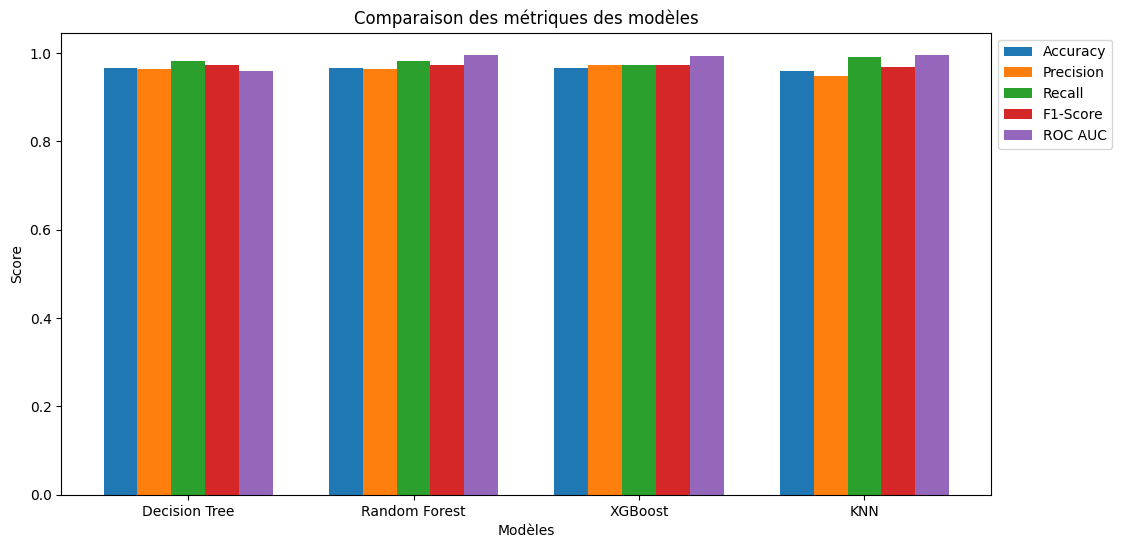

In [29]:
# Données pour le graphique
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
models_names = list(models.keys())
values = np.array([[results[model][metric] for model in models_names] for metric in metrics])

# Création du graphique
x = np.arange(len(models_names))  # Positions des groupes
width = 0.15  # Largeur des barres

fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, values[i], width, label=metric)

# Ajout des labels et titres
ax.set_xlabel('Modèles')
ax.set_ylabel('Score')
ax.set_title('Comparaison des métriques des modèles')
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models_names)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# **b. Comparaison du temps d'entraînement:**

Nous allons créer un graphique à barres pour comparer le temps d'entraînement des modèles.

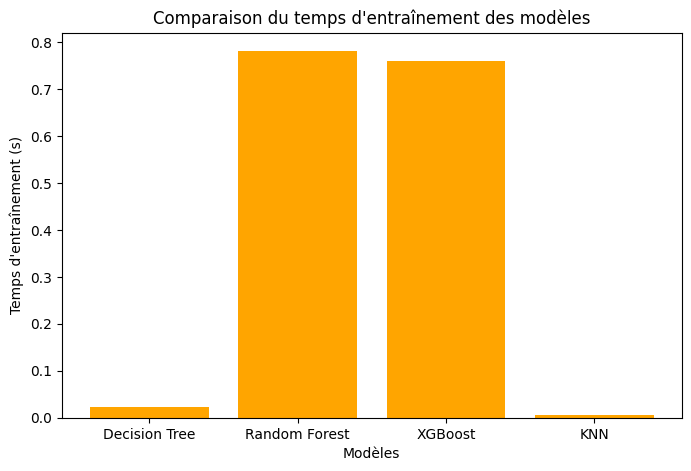

In [30]:
# Données pour le graphique
training_times = [results[model]['Training Time (s)'] for model in models_names]

# Création du graphique
plt.figure(figsize=(8, 5))
plt.bar(models_names, training_times, color='orange')
plt.xlabel('Modèles')
plt.ylabel('Temps d\'entraînement (s)')
plt.title('Comparaison du temps d\'entraînement des modèles')
plt.show()

# **c. Courbes ROC:**

Nous allons tracer les courbes ROC pour chaque modèle afin de comparer leurs performances en termes de taux de vrais positifs (TPR) et de taux de faux positifs (FPR).

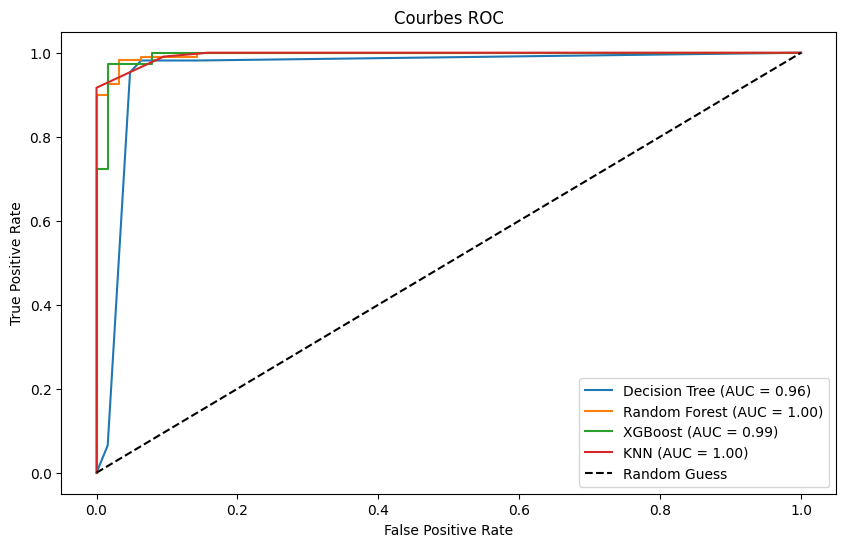

In [31]:
from sklearn.metrics import roc_curve, auc

# Fonction pour tracer les courbes ROC
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Courbes ROC')
    plt.legend()
    plt.show()

# Tracer les courbes ROC
plot_roc_curves(models, X_test, y_test)

# **d. Matrices de confusion:**

Nous allons afficher les matrices de confusion pour chaque modèle afin de visualiser les erreurs de classification.

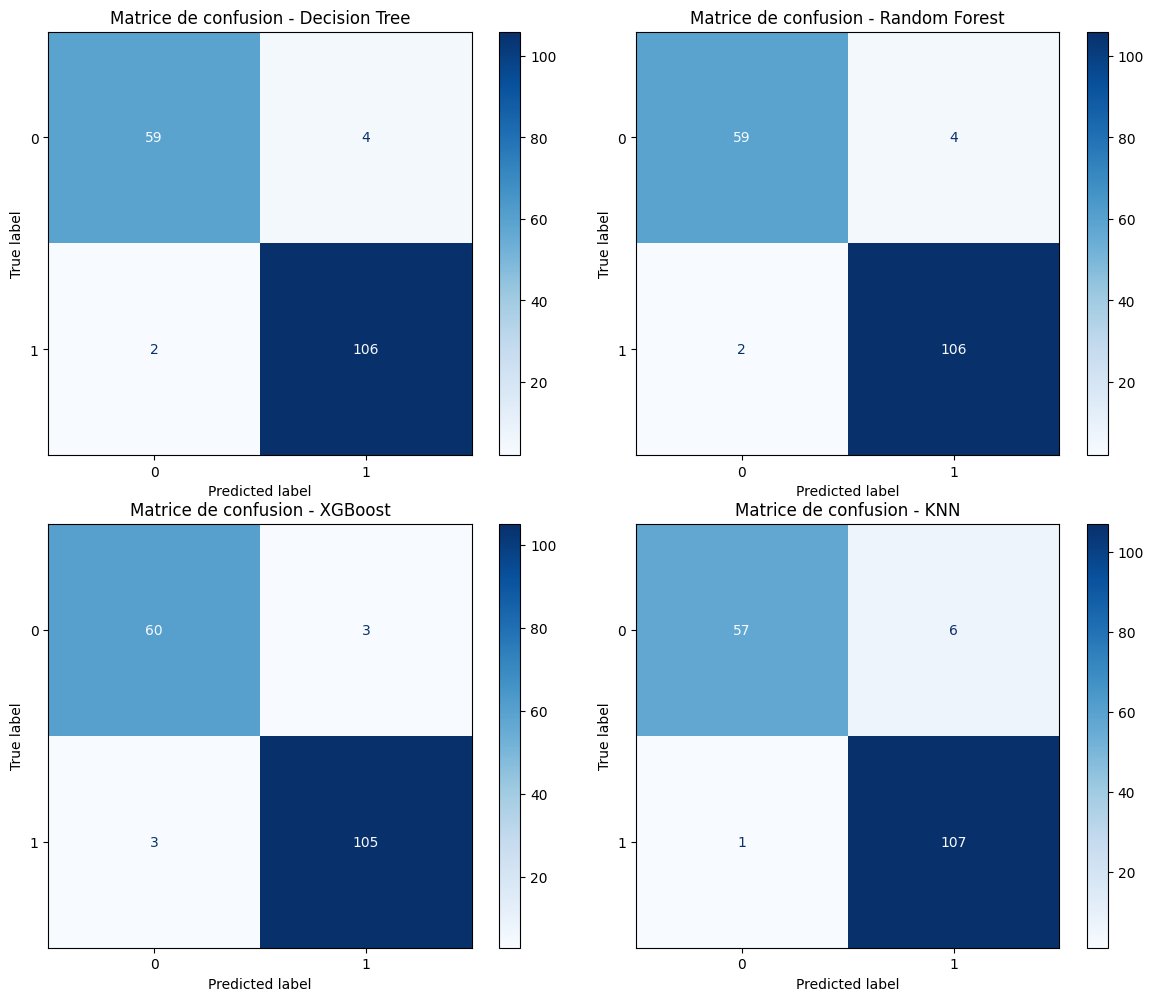

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

# Fonction pour afficher les matrices de confusion
def plot_confusion_matrices(models, X_test, y_test):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()

    for i, (name, model) in enumerate(models.items()):
        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=axes[i], cmap='Blues')
        axes[i].set_title(f'Matrice de confusion - {name}')

    plt.tight_layout()
    plt.show()

# Afficher les matrices de confusion
plot_confusion_matrices(models, X_test, y_test)

# **e. Courbes de calibration:**

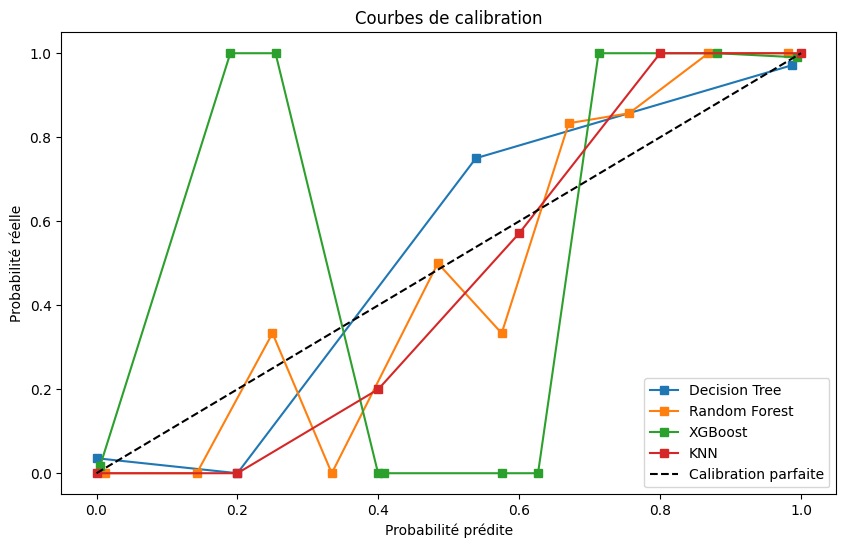

In [33]:
from sklearn.calibration import calibration_curve

# Fonction pour tracer les courbes de calibration
def plot_calibration_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
        plt.plot(prob_pred, prob_true, 's-', label=f'{name}')

    plt.plot([0, 1], [0, 1], 'k--', label='Calibration parfaite')
    plt.xlabel('Probabilité prédite')
    plt.ylabel('Probabilité réelle')
    plt.title('Courbes de calibration')
    plt.legend()
    plt.show()

# Tracer les courbes de calibration
plot_calibration_curve(models, X_test, y_test)

# **f.Scores de validation croisée :**

C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_3232\3921721159.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores, positions=[list(models.keys()).index(name)], labels=[name])
C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_3232\3921721159.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores, positions=[list(models.keys()).index(name)], labels=[name])
c:\Users\HERO-INFO\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [07:32:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Us

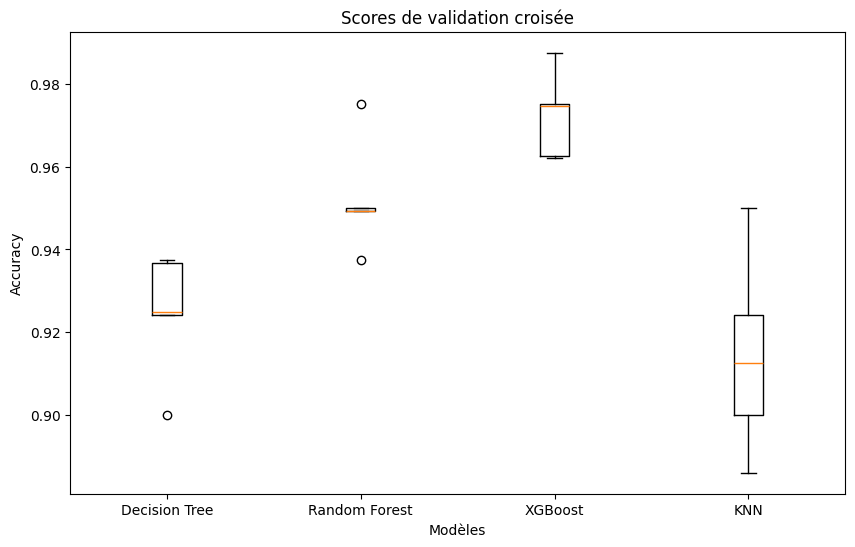

In [34]:
from sklearn.model_selection import cross_val_score

# Fonction pour tracer les boxplots des scores de validation croisée
def plot_cross_val_scores(models, X, y):
    plt.figure(figsize=(10, 6))
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        plt.boxplot(scores, positions=[list(models.keys()).index(name)], labels=[name])

    plt.xlabel('Modèles')
    plt.ylabel('Accuracy')
    plt.title('Scores de validation croisée')
    plt.show()

# Tracer les boxplots
plot_cross_val_scores(models, X_train, y_train)

#**7.Feature Importance:**

# **7.1. Arbre de décision**


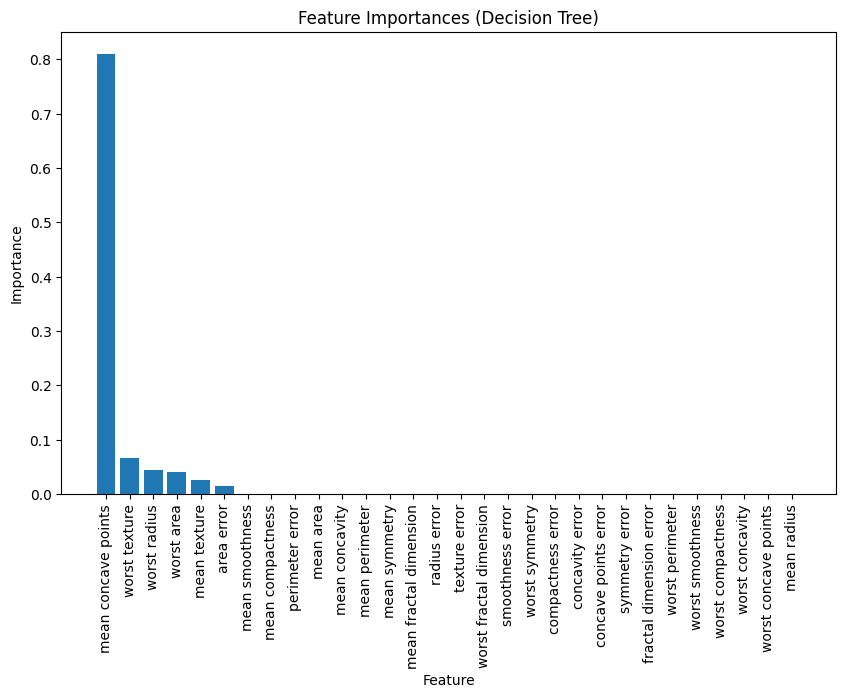

In [35]:
# Obtenir les importances des caractéristiques
importances = best_dt_model.feature_importances_
feature_names = data.feature_names
indices = np.argsort(importances)[::-1]

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Decision Tree)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


# **7.2. Forêt aléatoire**

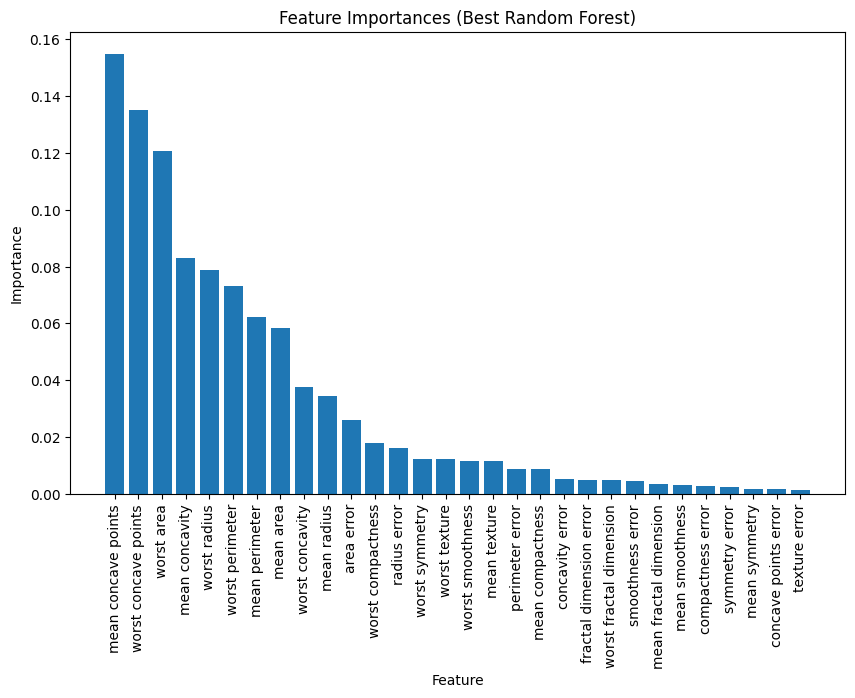

In [36]:
# Obtenir les importances des caractéristiques
importances = best_rf_model.feature_importances_
feature_names = data.feature_names  # Noms des caractéristiques
indices = np.argsort(importances)[::-1]  # Trier les indices par ordre décroissant d'importance

# Tracer le graphique des importances des caractéristiques
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Best Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


# **7.3. XGBoost**

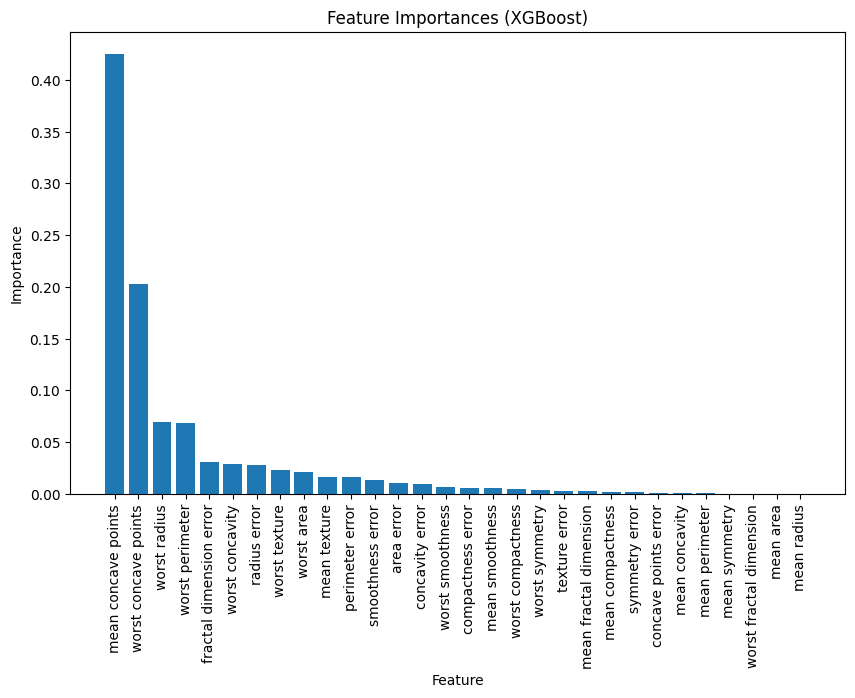

In [37]:
# Obtenir les importances des caractéristiques
importances = best_xgb_model.feature_importances_
feature_names = data.feature_names
indices = np.argsort(importances)[::-1]

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (XGBoost)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# **7.4. K-Nearest Neighbors (KNN)**

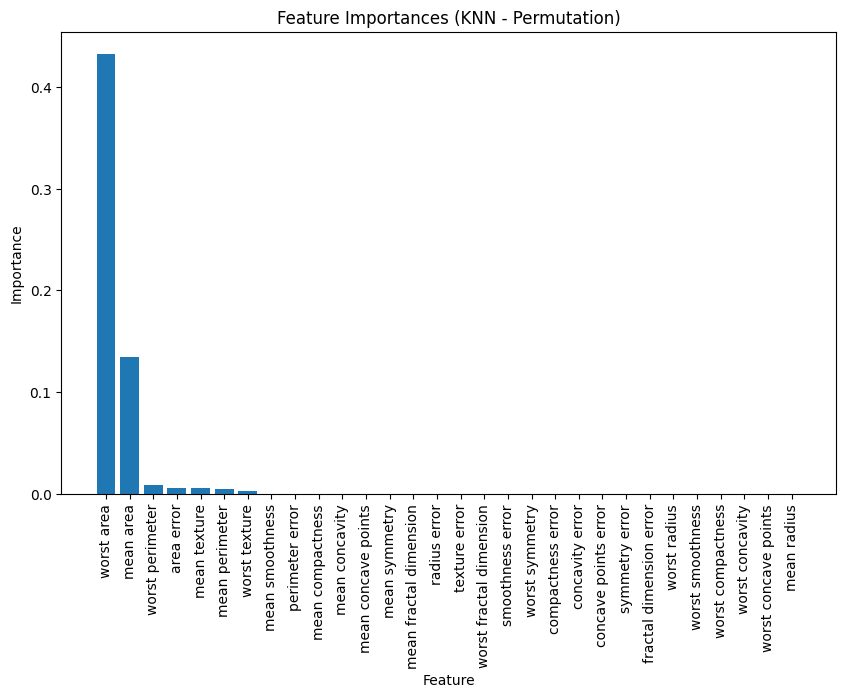

In [39]:

from sklearn.inspection import permutation_importance
# Calculer l'importance des caractéristiques par permutation
result = permutation_importance(best_knn_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
feature_names = data.feature_names
indices = np.argsort(importances)[::-1]

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (KNN - Permutation)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

**Comparaison des importances des caractéristiques**

Top 10 des caractéristiques les plus importantes by Random Forest :
                 Feature  Decision Tree  Random Forest   XGBoost       KNN
7    mean concave points       0.809978       0.154884  0.425132  0.000000
27  worst concave points       0.000000       0.135103  0.202842  0.000000
23            worst area       0.040310       0.120754  0.020642  0.432749
6         mean concavity       0.000000       0.083142  0.000794  0.000000
20          worst radius       0.043482       0.078621  0.069738  0.000000
22       worst perimeter       0.000000       0.073063  0.068395  0.008772
2         mean perimeter       0.000000       0.062221  0.000417  0.004678
3              mean area       0.000000       0.058350  0.000000  0.134503
26       worst concavity       0.000000       0.037710  0.028402  0.000000
0            mean radius       0.000000       0.034610  0.000000  0.000000


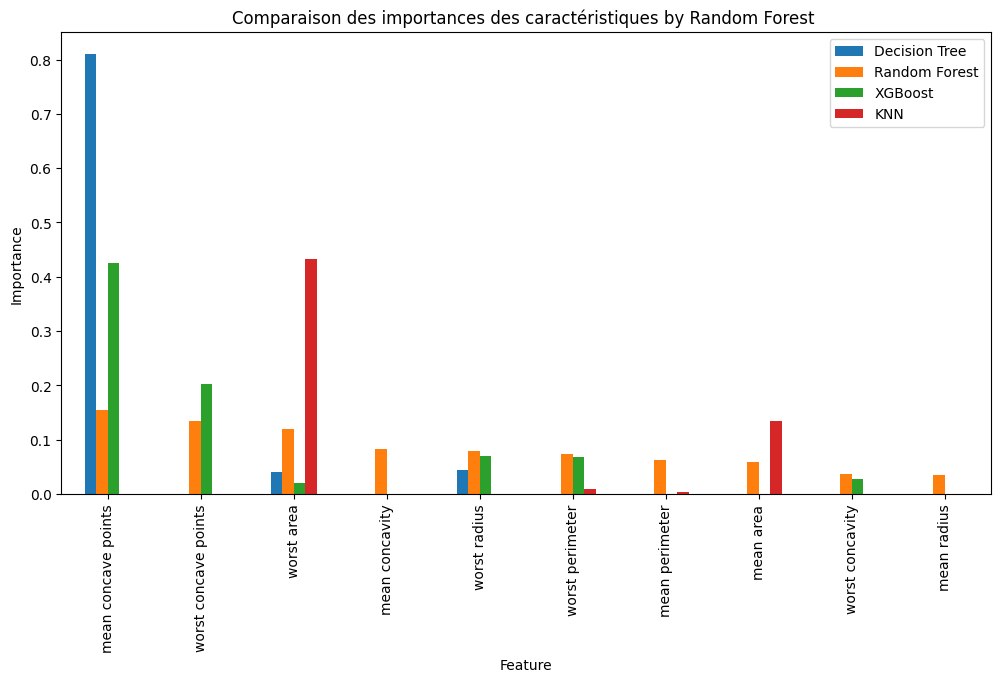

In [40]:
import pandas as pd

# Créer un DataFrame pour comparer les importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Decision Tree': best_dt_model.feature_importances_,
    'Random Forest': best_rf_model.feature_importances_,
    'XGBoost': best_xgb_model.feature_importances_,
    'KNN': importances  # Importances calculées par permutation pour KNN
})

# Trier par importance dans Random Forest (ou un autre modèle)
importances_df = importances_df.sort_values(by='Random Forest', ascending=False)

# Afficher les 10 caractéristiques les plus importantes pour chaque modèle
print("Top 10 des caractéristiques les plus importantes by Random Forest :")
print(importances_df.head(10))

# Tracer un graphique comparatif
importances_df.head(10).plot(kind='bar', x='Feature', figsize=(12, 6))
plt.title('Comparaison des importances des caractéristiques by Random Forest ')
plt.ylabel('Importance')
plt.show()

Top 10 des caractéristiques les plus importantes by Decision Tree:
                Feature  Decision Tree  Random Forest   XGBoost       KNN
7   mean concave points       0.809978       0.154884  0.425132  0.000000
21        worst texture       0.066145       0.012203  0.022565  0.002339
20         worst radius       0.043482       0.078621  0.069738  0.000000
23           worst area       0.040310       0.120754  0.020642  0.432749
1          mean texture       0.025169       0.011622  0.016529  0.005848
13           area error       0.014916       0.026100  0.010814  0.005848
8         mean symmetry       0.000000       0.001638  0.000299  0.000000
18       symmetry error       0.000000       0.002508  0.001412  0.000000
15    compactness error       0.000000       0.002919  0.005619  0.000000
5      mean compactness       0.000000       0.008596  0.001866  0.000000


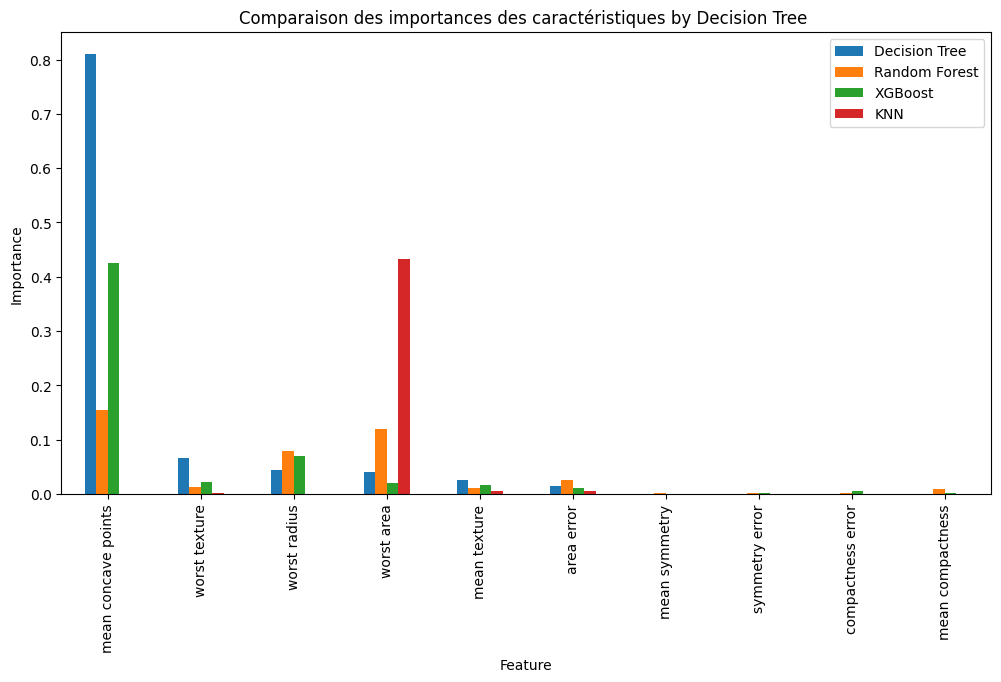

In [41]:


# Trier par importance dans Decision Tree(ou un autre modèle)
importances_df = importances_df.sort_values(by='Decision Tree', ascending=False)

# Afficher les 10 caractéristiques les plus importantes pour chaque modèle
print("Top 10 des caractéristiques les plus importantes by Decision Tree:")
print(importances_df.head(10))

# Tracer un graphique comparatif
importances_df.head(10).plot(kind='bar', x='Feature', figsize=(12, 6))
plt.title('Comparaison des importances des caractéristiques by Decision Tree ')
plt.ylabel('Importance')
plt.show()

Top 10 des caractéristiques les plus importantes by XGBoost:
                    Feature  Decision Tree  Random Forest   XGBoost       KNN
7       mean concave points       0.809978       0.154884  0.425132  0.000000
27     worst concave points       0.000000       0.135103  0.202842  0.000000
20             worst radius       0.043482       0.078621  0.069738  0.000000
22          worst perimeter       0.000000       0.073063  0.068395  0.008772
19  fractal dimension error       0.000000       0.004996  0.030805  0.000000
26          worst concavity       0.000000       0.037710  0.028402  0.000000
10             radius error       0.000000       0.016184  0.027867  0.000000
21            worst texture       0.066145       0.012203  0.022565  0.002339
23               worst area       0.040310       0.120754  0.020642  0.432749
1              mean texture       0.025169       0.011622  0.016529  0.005848


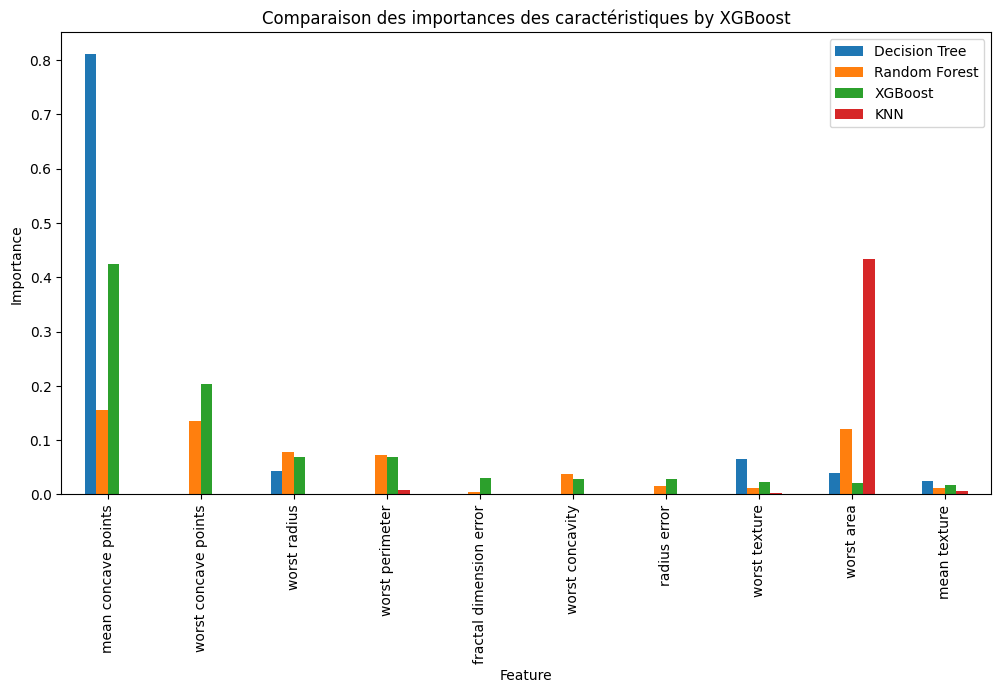

In [42]:


# Trier par importance dans XGBoost(ou un autre modèle)
importances_df = importances_df.sort_values(by='XGBoost', ascending=False)

# Afficher les 10 caractéristiques les plus importantes pour chaque modèle
print("Top 10 des caractéristiques les plus importantes by XGBoost:")
print(importances_df.head(10))

# Tracer un graphique comparatif
importances_df.head(10).plot(kind='bar', x='Feature', figsize=(12, 6))
plt.title('Comparaison des importances des caractéristiques by XGBoost')
plt.ylabel('Importance')
plt.show()

Top 10 des caractéristiques les plus importantes by KNN:
                    Feature  Decision Tree  Random Forest   XGBoost       KNN
23               worst area       0.040310       0.120754  0.020642  0.432749
3                 mean area       0.000000       0.058350  0.000000  0.134503
22          worst perimeter       0.000000       0.073063  0.068395  0.008772
13               area error       0.014916       0.026100  0.010814  0.005848
1              mean texture       0.025169       0.011622  0.016529  0.005848
2            mean perimeter       0.000000       0.062221  0.000417  0.004678
21            worst texture       0.066145       0.012203  0.022565  0.002339
0               mean radius       0.000000       0.034610  0.000000  0.000000
29  worst fractal dimension       0.000000       0.004822  0.000000  0.000000
8             mean symmetry       0.000000       0.001638  0.000299  0.000000


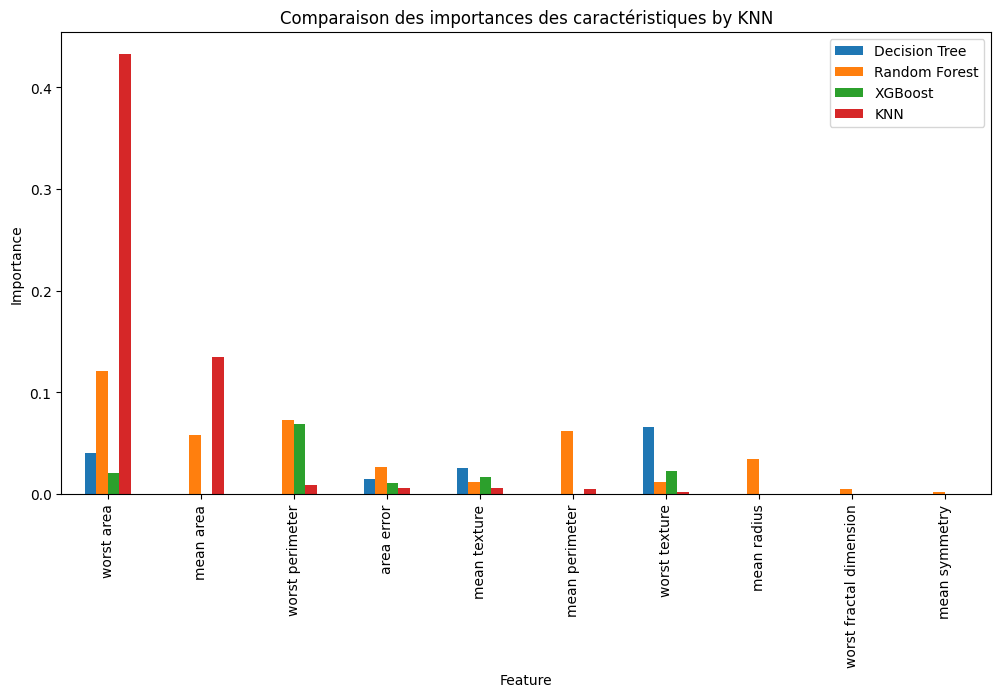

In [43]:


# Trier par importance dans KNN (ou un autre modèle)
importances_df = importances_df.sort_values(by='KNN', ascending=False)

# Afficher les 10 caractéristiques les plus importantes  pour chaque modèle
print("Top 10 des caractéristiques les plus importantes by KNN:")
print(importances_df.head(10))

# Tracer un graphique comparatif
importances_df.head(10).plot(kind='bar', x='Feature', figsize=(12, 6))
plt.title('Comparaison des importances des caractéristiques by KNN')
plt.ylabel('Importance')
plt.show()

In [46]:
from collections import defaultdict

# Liste des top 10 caractéristiques pour chaque modèle
top_features_rf = [
    'mean concave points', 'worst concave points', 'worst area', 'mean concavity',
    'worst radius', 'worst perimeter', 'mean perimeter', 'mean area',
    'worst concavity', 'mean radius'
]

top_features_dt = [
    'worst area', 'mean area', 'worst perimeter', 'area error', 'mean texture',
    'mean perimeter', 'worst texture', 'mean radius', 'worst fractal dimension',
    'mean symmetry'
]

top_features_knn = [
    'mean concave points', 'worst concave points', 'worst radius', 'worst perimeter',
    'fractal dimension error', 'worst concavity', 'radius error', 'worst texture',
    'worst area', 'mean texture'
]

top_features_xgb = [
    'mean concave points', 'worst texture', 'worst radius', 'worst area',
    'mean texture', 'area error', 'mean symmetry', 'symmetry error',
    'compactness error', 'mean compactness'
]

# Compter les occurrences de chaque caractéristique
feature_counts = defaultdict(int)
for feature in top_features_rf + top_features_dt + top_features_knn + top_features_xgb:
    feature_counts[feature] += 1

# Convertir en DataFrame pour une meilleure visualisation
import pandas as pd
feature_counts_df = pd.DataFrame(feature_counts.items(), columns=['Feature', 'Count'])
feature_counts_df = feature_counts_df.sort_values(by='Count', ascending=False)

print("Occurrences des caractéristiques dans les top 10 :")
print(feature_counts_df)

Occurrences des caractéristiques dans les top 10 :
                    Feature  Count
2                worst area      4
0       mean concave points      3
4              worst radius      3
5           worst perimeter      3
12            worst texture      3
11             mean texture      3
9               mean radius      2
14            mean symmetry      2
1      worst concave points      2
10               area error      2
8           worst concavity      2
7                 mean area      2
6            mean perimeter      2
13  worst fractal dimension      1
3            mean concavity      1
15  fractal dimension error      1
16             radius error      1
17           symmetry error      1
18        compactness error      1
19         mean compactness      1


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_3232\3077952141.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Feature', data=feature_counts_df, palette='viridis')


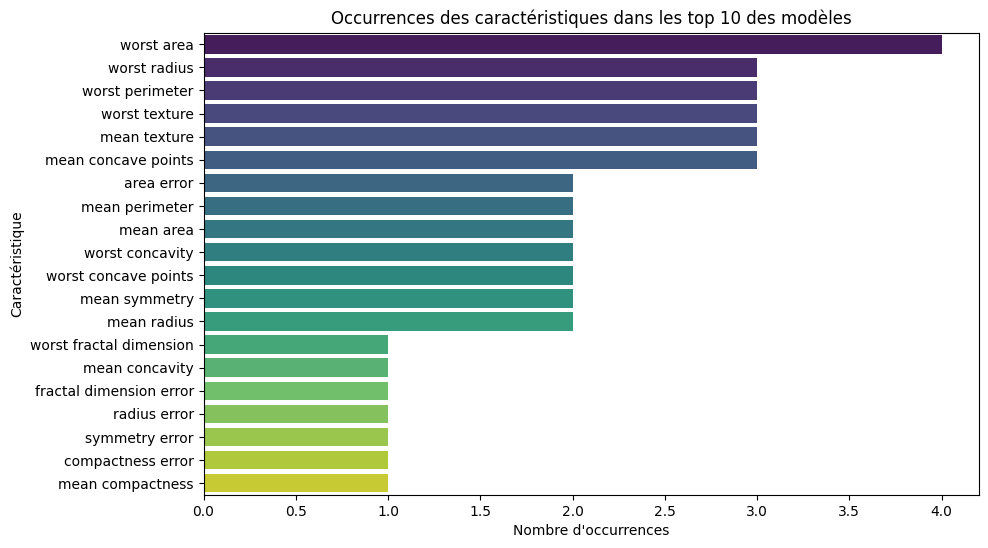

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trier les caractéristiques par nombre d'occurrences
feature_counts_df = feature_counts_df.sort_values(by='Count', ascending=False)

# Tracer le graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Feature', data=feature_counts_df, palette='viridis')
plt.title('Occurrences des caractéristiques dans les top 10 des modèles')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Caractéristique')
plt.show()

In [48]:
# Sélectionner les 10 caractéristiques
top_features = [
    'mean concave points', 'worst concave points', 'worst area', 'worst radius',
    'worst perimeter', 'mean texture', 'worst texture', 'area error',
    'worst concavity', 'mean radius'
]

# Convertir data.feature_names en liste (si ce n'est pas déjà fait)
feature_names = data.feature_names.tolist()

# Obtenir les indices des caractéristiques sélectionnées
indices = [feature_names.index(feature) for feature in top_features]

# Sélectionner les colonnes correspondantes dans X_train et X_test
X_train_top = X_train.iloc[:, indices]
X_test_top = X_test.iloc[:, indices]

# Fonction pour réentraîner et évaluer un modèle
def retrain_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy:.2f}")
    print(f"  ROC AUC: {roc_auc:.2f}")
    print("  Classification Report:")
    print(classification_report(y_test, y_pred))

# Réentraîner et évaluer chaque modèle
print("Performances après sélection des 10 caractéristiques :")
retrain_and_evaluate(best_dt_model, X_train_top, y_train, X_test_top, y_test, "Decision Tree (Top 10 Features)")
retrain_and_evaluate(best_rf_model, X_train_top, y_train, X_test_top, y_test, "Random Forest (Top 10 Features)")
retrain_and_evaluate(best_xgb_model, X_train_top, y_train, X_test_top, y_test, "XGBoost (Top 10 Features)")
retrain_and_evaluate(best_knn_model, X_train_top, y_train, X_test_top, y_test, "knn (Top 10 Features)")

Performances après sélection des 10 caractéristiques :
Decision Tree (Top 10 Features):
  Accuracy: 0.97
  ROC AUC: 0.97
  Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Random Forest (Top 10 Features):
  Accuracy: 0.98
  ROC AUC: 0.99
  Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



c:\Users\HERO-INFO\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [08:12:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost (Top 10 Features):
  Accuracy: 0.97
  ROC AUC: 0.99
  Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

knn (Top 10 Features):
  Accuracy: 0.93
  ROC AUC: 0.98
  Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        63
           1       0.94      0.94      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [49]:
# Évaluation des modèles
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train_top, y_train, X_test_top, y_test)

# Création d'un DataFrame pour afficher les résultats
results_df = pd.DataFrame(results).T
print(results_df)

c:\Users\HERO-INFO\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [08:13:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


               Accuracy  Precision    Recall  F1-Score   ROC AUC  \
Decision Tree  0.970760   0.972477  0.981481  0.976959  0.974353   
Random Forest  0.976608   0.972727  0.990741  0.981651  0.994415   
XGBoost        0.970760   0.972477  0.981481  0.976959  0.994268   
KNN            0.929825   0.944444  0.944444  0.944444  0.980379   

               Training Time (s)  
Decision Tree           0.008996  
Random Forest           0.417741  
XGBoost                 0.391758  
KNN                     0.005996  


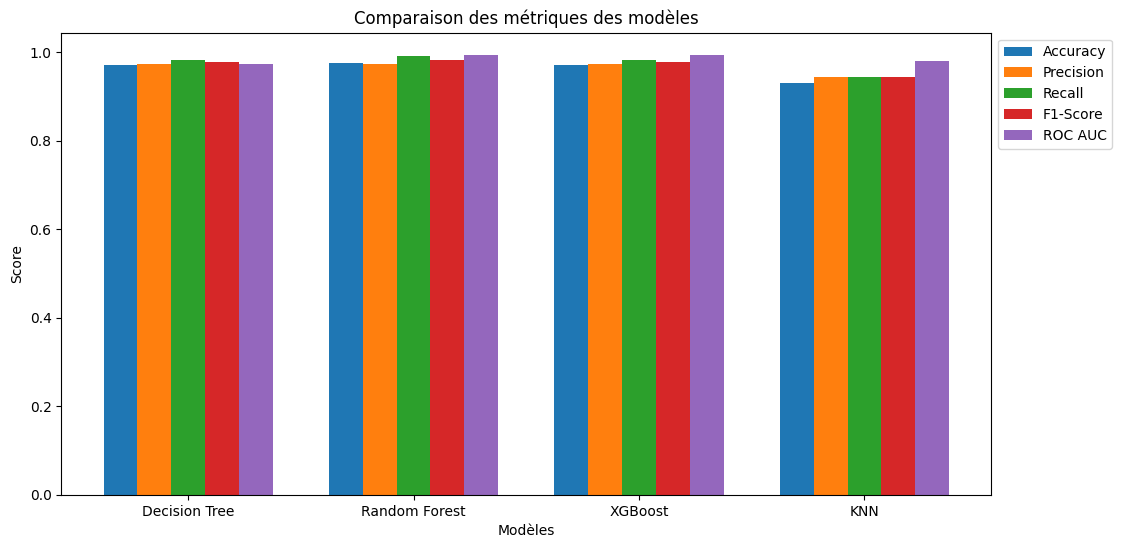

In [50]:
# Données pour le graphique
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
models_names = list(models.keys())
values = np.array([[results[model][metric] for model in models_names] for metric in metrics])

# Création du graphique
x = np.arange(len(models_names))  # Positions des groupes
width = 0.15  # Largeur des barres

fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, values[i], width, label=metric)

# Ajout des labels et titres
ax.set_xlabel('Modèles')
ax.set_ylabel('Score')
ax.set_title('Comparaison des métriques des modèles')
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models_names)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

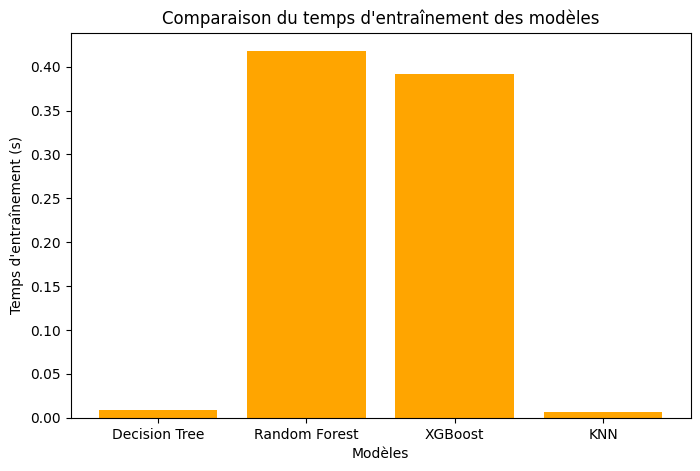

In [51]:
# Données pour le graphique
training_times = [results[model]['Training Time (s)'] for model in models_names]

# Création du graphique
plt.figure(figsize=(8, 5))
plt.bar(models_names, training_times, color='orange')
plt.xlabel('Modèles')
plt.ylabel('Temps d\'entraînement (s)')
plt.title('Comparaison du temps d\'entraînement des modèles')
plt.show()

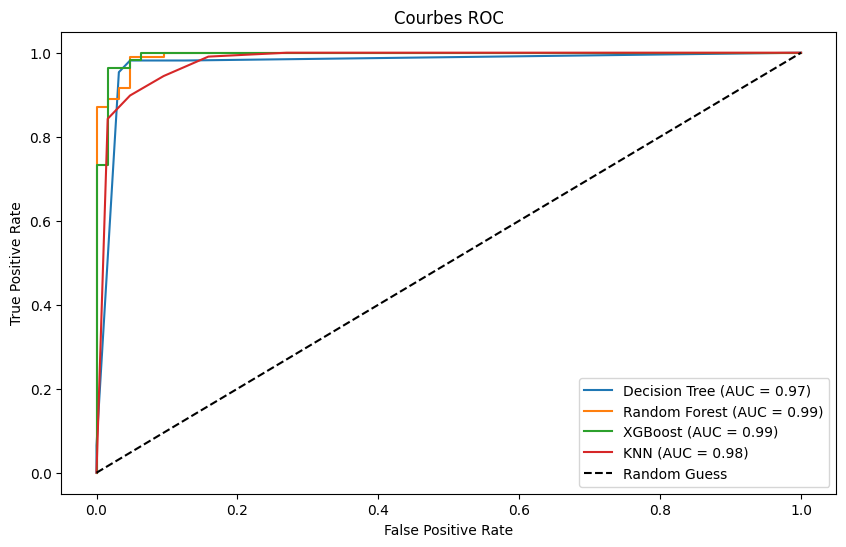

In [52]:

# Tracer les courbes ROC
plot_roc_curves(models, X_test_top, y_test)

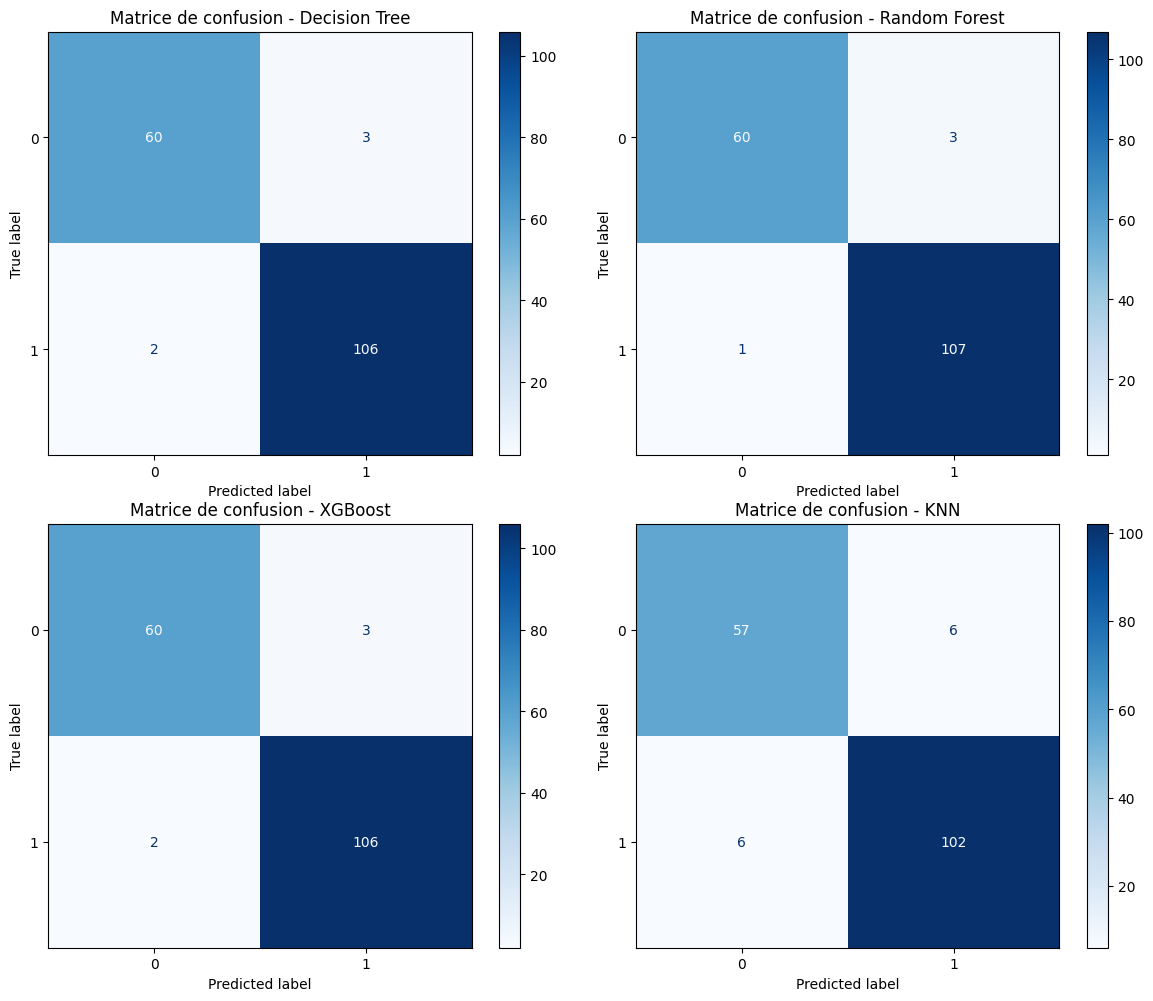

In [53]:
# Afficher les matrices de confusion
plot_confusion_matrices(models, X_test_top, y_test)

# **8. Observations**


Les performances des modèles restent globalement les mêmes après la sélection des 10 caractéristiques.

Cela indique que les 10 caractéristiques sélectionnées capturent l'essentiel de l'information nécessaire pour faire des prédictions précises.

La réduction du nombre de caractéristiques simplifie les modèles sans sacrifier la performance.


# **9. Conclusion**



La sélection des 10 caractéristiques les plus importantes permet de simplifier les modèles tout en maintenant leurs performances.

Cela peut également réduire le temps d'entraînement et améliorer l'interprétabilité des modèles.

Si les performances restent stables, cela confirme que les caractéristiques sélectionnées sont pertinentes.